In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight

# Load the Dataset

In [3]:
df = pd.read_csv(r"/kaggle/input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape
#means 284807 observations and 31 variables

(284807, 31)

# Check the percentage of real and fraud transaction

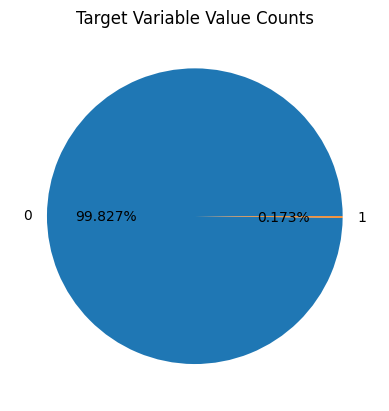

In [5]:
# get the set of distinct classes
labels = df.Class.unique()

# get the count of each class
sizes = df.Class.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

#### As shown above, the Class variable has two values: 0 (the credit card transaction is legitimate) and 1 (the credit card transaction is fraudulent).

# Plotting a histogram to find the distribution of amounts

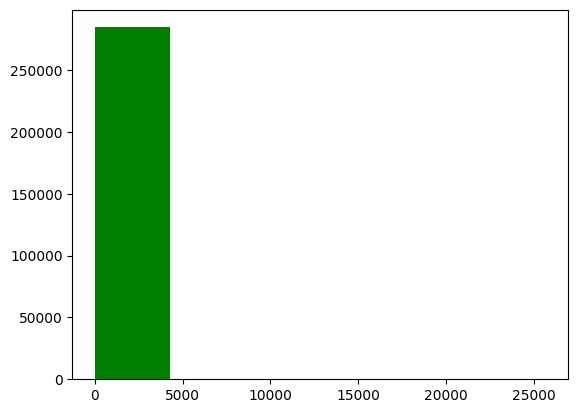

In [6]:
plt.hist(df.Amount.values, 6, histtype='bar', facecolor='g')
plt.show()

In [7]:
print("Minimum amount value is : ", np.min(df.Amount.values))
print("Maximum amount value is : ",np.max(df.Amount.values))
print("90% of the transactions have an amount less or equal than : ",np.percentile(df.Amount.values,90))

Minimum amount value is :  0.0
Maximum amount value is :  25691.16
90% of the transactions have an amount less or equal than :  203.0


# Pre-Processing

In [8]:
df.iloc[:,1:30] = StandardScaler().fit_transform(df.iloc[:,1:30])
data_matrix = df.values

X = data_matrix[:, 1:30]

y = data_matrix[:, 30]

#data normalization
X = normalize(X,norm='l1')

print('X.shape is', X.shape, 'and y.shape is : ', y.shape)

X.shape is (284807, 29) and y.shape is :  (284807,)


- StandardScaler() is a method used for standardization of features in a dataset. The process involves transforming the data such that its distribution will have a mean value 0 and a standard deviation of 1. This ensures that the features are on a similar scale, preventing features with larger scales from dominating the learning process. It's particularly useful for linear models because it helps them converge faster during training.
- Mean Removal: By subtracting the mean from each feature, you center the data around zero. This helps in removing any bias that may be present in the features.
- Variance Scaling: After centering the data, the scaling step ensures that each feature has a unit variance. This is important because features with larger variances can disproportionately influence the model's learning process. Scaling them to unit variance ensures that each feature contributes equally to the model's decision-making process.

- Finally, X = normalize(X, norm="l1") normalizes the feature matrix X using L1 normalization. L1 normalization, also known as least absolute deviations, ensures that each row of the matrix X has a sum of absolute values equal to 1. This can be useful in certain scenarios, particularly when dealing with sparse data, as it brings all feature values within a similar range and ensures that each sample has equal importance.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (199364, 29) Y_train.shape= (199364,)
X_test.shape= (85443, 29) Y_test.shape= (85443,)


# Decision Tree Model

In [10]:
from sklearn.tree import DecisionTreeClassifier
w_train = compute_sample_weight('balanced', y_train)
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)
sklearn_dt.fit(X_train, y_train, sample_weight=w_train)

DecisionTreeClassifier(max_depth=4, random_state=35)

## Prediction

In [11]:
pred = sklearn_dt.predict(X_test)

## Evaluation

In [12]:
from sklearn import metrics
print("Acuuracy is : ", metrics.accuracy_score(y_test, pred))

Acuuracy is :  0.9709982093325374


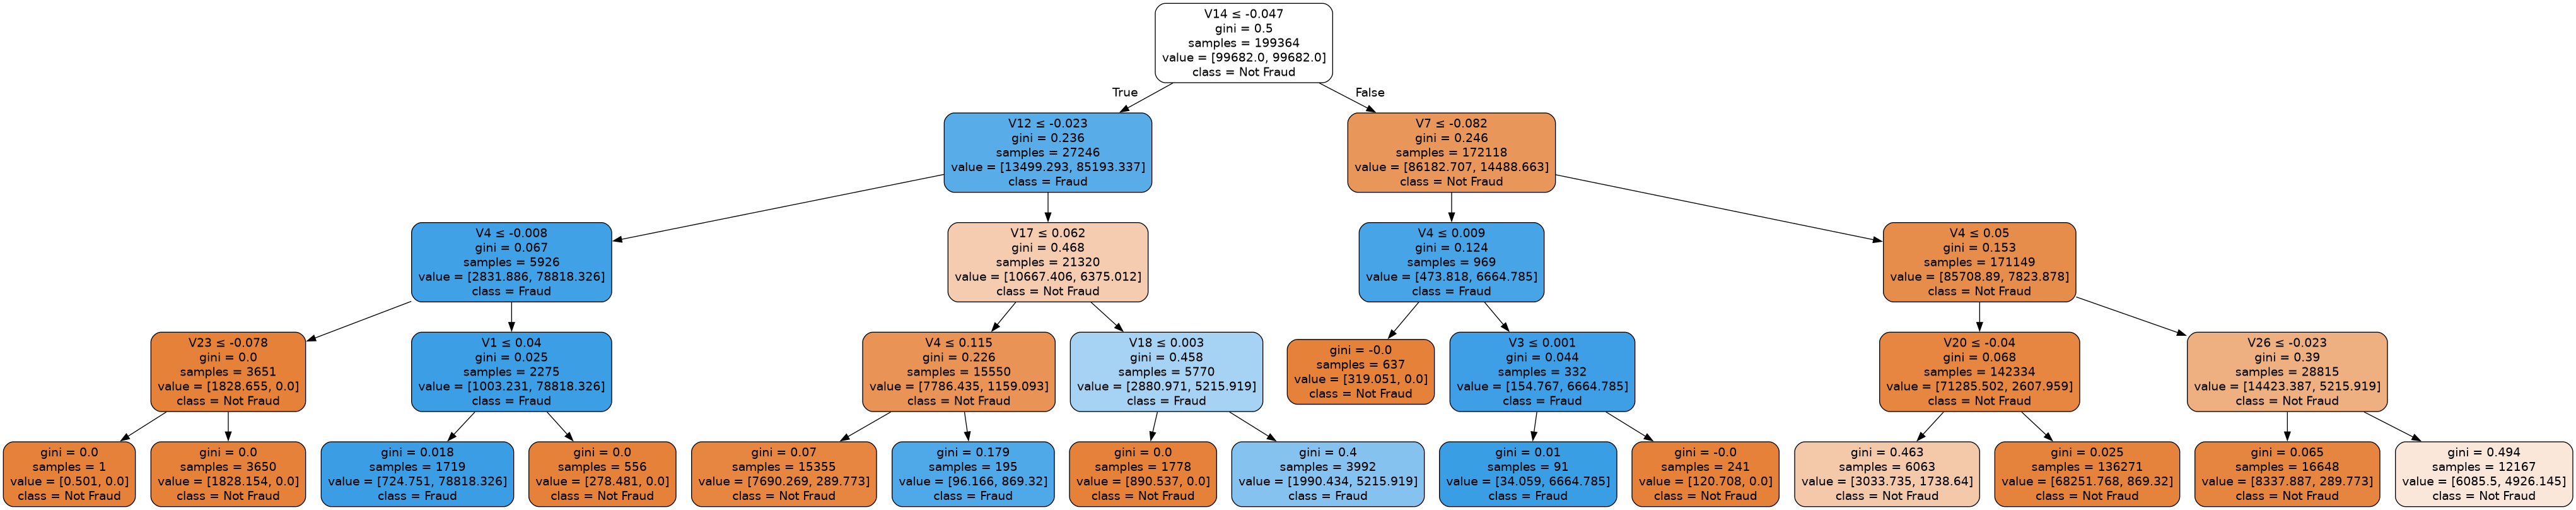

In [13]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree as a Graphviz object
dot_data = export_graphviz(sklearn_dt, out_file=None, 
                           feature_names=df.columns[1:30],  
                           class_names=["Not Fraud", "Fraud"],  
                           filled=True, rounded=True,  
                           special_characters=True)  

# Create a graph from the DOT data
graph = graphviz.Source(dot_data)

# Render the decision tree with adjustable size
graph.format = 'png'
graph.render('decision_tree', view=False)

# Display the decision tree image
from IPython.display import Image
Image(filename='decision_tree.png', width=1400, height=1600)